<a href="https://colab.research.google.com/github/josueelias9/AI-Machine_learning_with_Tensorflow/blob/main/ejemplos%20python/Images/Convolutional%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()

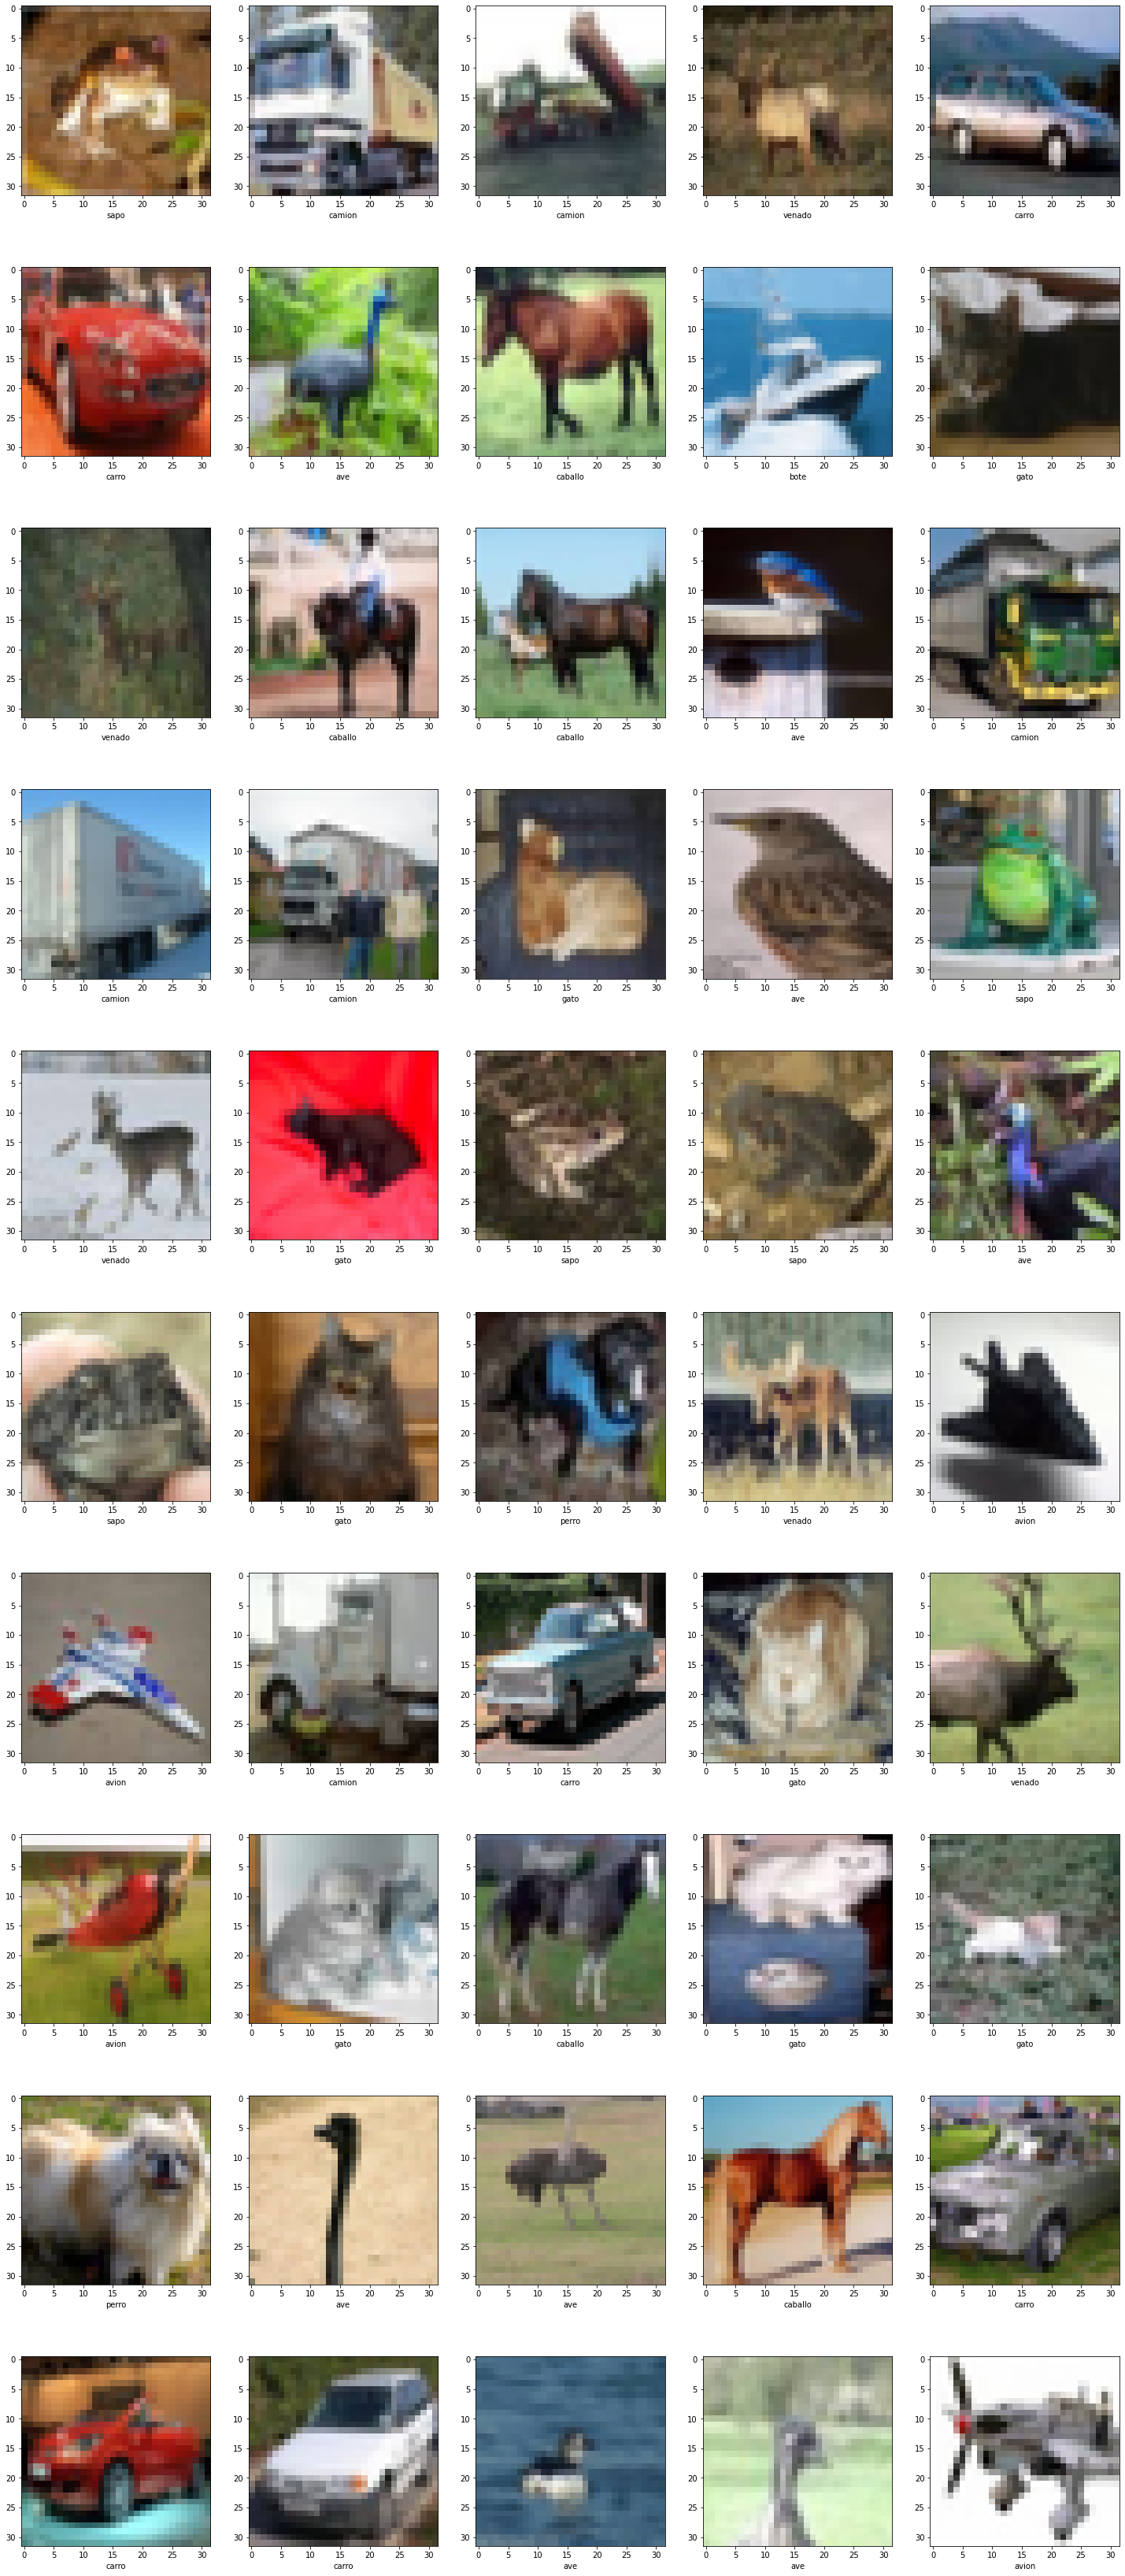

In [49]:
animales = [
    'avion',#0
    'carro',#1
    'ave',#2
    'gato',#3
    'venado',#4
    'perro',#5
    'sapo',#6
    'caballo',#7
    'bote',#8
    'camion',#9
]

plt.figure(figsize=(25,60))
for i in range(50):
  plt.subplot(10,5,1+i)
  plt.imshow(train_data[i])
  plt.xlabel(animales[int(train_label[i])])
plt.show()

In [51]:
train_data[0].shape

(32, 32, 3)

In [65]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(
    filters=40,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(32,32,3)
))
model.add(layers.MaxPooling2D(
    pool_size=(2,2)
))
model.add(layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu'  
))
model.add(layers.MaxPooling2D(
    pool_size=(2,2)
))
model.add(
    layers.Flatten()
)
model.add(
    layers.Dense(
        units=64,
        activation='relu'
    )
)
model.add(
    layers.Dense(
        units=10
    )
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 40)        1120      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 40)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        23104     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)              

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(
    train_data,
    train_label,
    epochs=10
)

Epoch 1/10


InvalidArgumentError: ignored